In [1]:
import Orange
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Loading the data
---------------

In [2]:
# data = Orange.data.Table("data/age-sbp.tab")
data = Orange.data.Table("data/lin-painted.tab")

In [3]:
x, y = data.X, data.Y
X = np.column_stack((np.ones(len(x)), x))

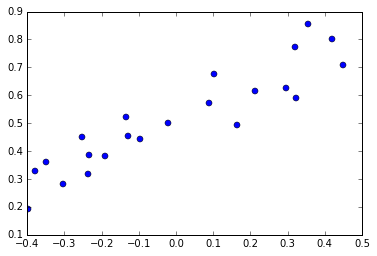

In [4]:
plt.plot(X[:,1], y, "o");

Linear regression
----------------

In [5]:
def gradient_descent(X, y, alpha=0.0001, epochs=1000):
    """For a matrix x and vector y return a linear regression model."""
    theta = np.zeros(X.shape[1]).T
    for i in range(epochs):
        theta = theta - alpha * (X.dot(theta) - y).dot(X) / len(X)
    return theta

def J(X, y, theta):
    return 0.5 * sum((X.dot(theta) - y)**2)

In [6]:
theta = gradient_descent(X, y, alpha=0.0005, epochs=100000)
print(theta)

[ 0.51516522  0.5680909 ]


In [7]:
J(X, y, [0, 0])

3.2509780775877579

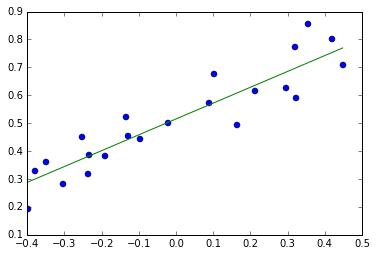

In [8]:
mm = np.array([min(X[:, 1]), max(X[:, 1])])
Xmm = np.column_stack((np.ones(len(mm)), mm))
plt.plot(x, y, "o");
plt.plot(Xmm[:, 1], Xmm.dot(theta));

Analytical solution
------------------

$$\Theta=(X^T X)^{-1}X^T y$$

In [9]:
def analytical(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

In [10]:
analytical(X, y)

array([ 0.51516522,  0.58156716])

Solution in a scaled space
-------------------------

Scaling the data (column) speeds-up the convergence.

In [11]:
x, y = data.X, data.Y
x_mean, x_std = x.mean(axis=0), x.std(axis=0)
xp = (x-x_mean)/(x_std)
X = np.column_stack((np.ones(len(xp)), xp))
theta = gradient_descent(X, y, alpha=0.1, epochs=100)

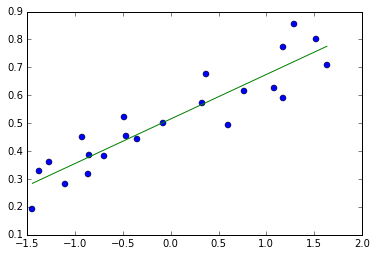

In [12]:
mm = np.array([min(X[:, 1]), max(X[:, 1])])
Xmm = np.column_stack((np.ones(len(mm)), mm))
plt.plot(xp, y, "o");
plt.plot(Xmm[:, 1], Xmm.dot(theta));

We need to compute the thetas that apply to the original (not scaled) data set.

In [13]:
theta[0] - theta[1:] * x_mean/x_std, theta[1:]/x_std

(array([ 0.51515154]), array([ 0.58155171]))

Coutour graph of the cost function
--

In [14]:
delta = 1
a = np.arange(0, 1, 0.01)
b = np.arange(-1, 2, 0.01)
ag, bg = np.meshgrid(a, b)

In [15]:
zg = np.array([J(X, y, np.array([a, b])) for a, b in zip(ag.flatten(), bg.flatten())]).reshape(ag.shape)

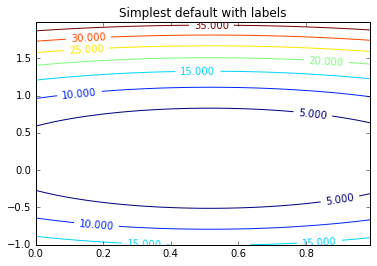

In [16]:
plt.clf()
CS = plt.contour(ag, bg, zg)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels');